<a href="https://colab.research.google.com/github/clementeaf/codingDojo-DS/blob/main/week3/Proyecto_prediccion_ventas-Parte3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
file = '/content/drive/MyDrive/sales_predictions_2023.csv'
df = pd.read_csv(file)
df

In [ ]:
#¿Cuántas filas y columnas?
# Obtener el número de filas y columnas
number_of_rows = len(df)
number_of_columns = df.shape[1]

# Imprimir los resultados
print("Número de filas:", number_of_rows)
print("Número de columnas:", number_of_columns)

In [ ]:
#¿Cuáles son los tipos de datos en cada variable?
# Obtener los tipos de datos de cada variable
data_types = df.dtypes

# Imprimir los resultados
print("Tipos de datos en cada variable:")
print(data_types)

In [ ]:
#¿Hay duplicados? Si es el caso, eliminen algunos duplicados
# Verificar si hay duplicados
duplicates = df.duplicated()

# Imprimir el número de duplicados
number_of_duplicates = duplicates.sum()

# Eliminar los duplicados
df = df.drop_duplicates()

# Imprimir el número de filas después de eliminar los duplicados
number_of_rows_after_drop = len(df)

# Imprimir los resultados
print("Número de duplicados:", number_of_duplicates)
print("Número de filas después de eliminar los duplicados:", number_of_rows_after_drop)

In [ ]:
#Identificar los valores faltantes.
# Contar los valores faltantes por columna
missing_values_count = df.isnull().sum()

print(missing_values_count)

In [ ]:
#cómo abordar los valores faltantes y cómo hacerlo
## Teniendo en consideración las prácticas más óptimas al momento de generar una limpieza de datos
## pertinente a la labor de la ciencia de datos, se identifican las siguientes prácticas:

# Eliminar los valores faltantes: Simple, pero puede generar la perdida de información importante
  # Ejemplo: si hay 10 valores faltantes en Item_Weight, se puede eliminar las 10 filas que contienen estos valores

# Rellenar los valores faltantes con valores nulos: Puede ser útil si la información faltante
# es poca y no se espere que esta tenga un impacto significativo en el análisis

# Rellenar los valores faltantes con valores estimados: Se puede hacer mediante el uso d: media, mediana o moda

In [ ]:
#Confirmar que no hay valores faltantes después de abordarlos.
# Eliminar los valores faltantes
df = df.dropna()

# Verificar si hay valores faltantes
missing_values = df.isnull()

# Imprimir el resultado
print(missing_values.sum())

In [ ]:
#Encuentren y arreglen alguna categoría inconsistente de datos (example: fix cat, Cat, and cats so that they are consistent)
# Encontrar las categorías inconsistentes
inconsistent_categories = []
for category in df["Item_Type"]:
  if category != category.lower():
    inconsistent_categories.append(category)

# Arreglar las categorías inconsistentes
for category in inconsistent_categories:
  df["Item_Type"].replace(category, category.lower(), inplace=True)

# Imprimir las categorías inconsistentes arregladas
print(inconsistent_categories)

In [ ]:
#Para cualquier columna numérica, obtengan las estadísticas resumidas para cada uno (mínimo, máximo y media)
# Encontrar todas las columnas que sean numéricas
numeric_columns = df.select_dtypes(include=[np.number])

# Obtener las estadísticas resumidas para cada columna numérica
column_summaries = []
for column in numeric_columns:
  column_summary = df[column].describe()
  column_summaries.append(column_summary)

# Imprimir un print() que refleje estos resultados de manera clara, precisa y detallada
print("Estadísticas resumidas para las columnas numéricas:")
for column_summary in column_summaries:
  print(column_summary.to_markdown())

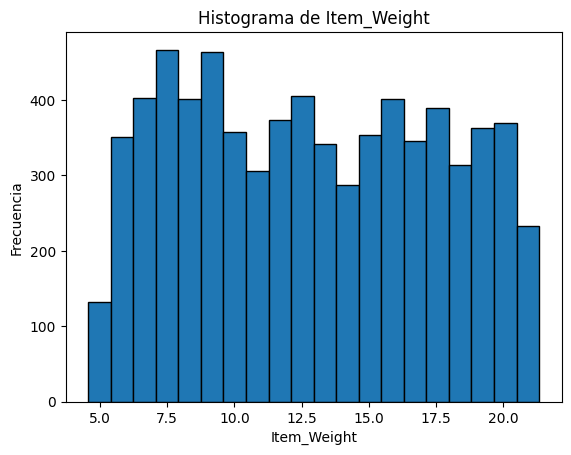

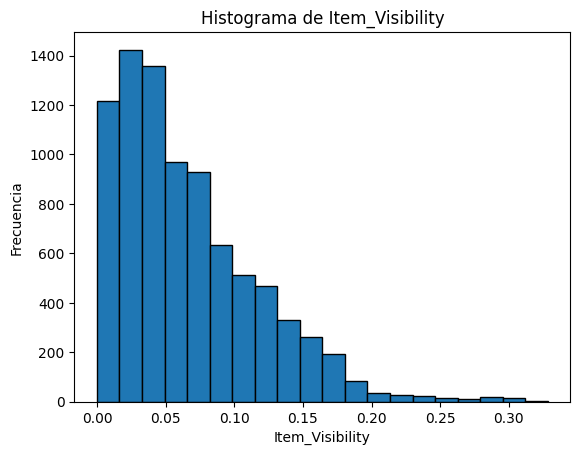

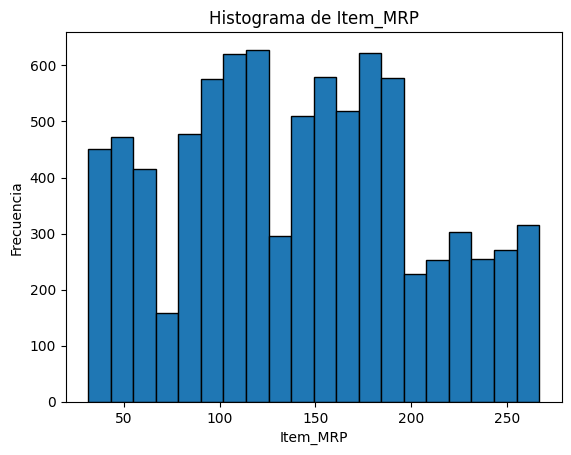

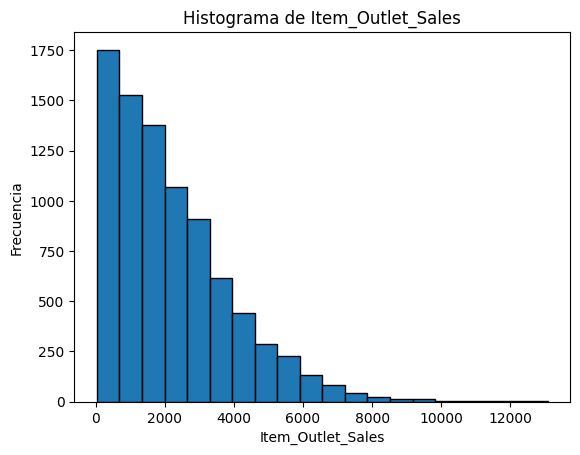

In [8]:
# Seleccionar las columnas numéricas relevantes
numeric_columns = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']

# Crear los histogramas para cada columna numérica
for column in numeric_columns:
    plt.hist(df[column], bins=20, edgecolor='black')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.title(f'Histograma de {column}')
    plt.show()

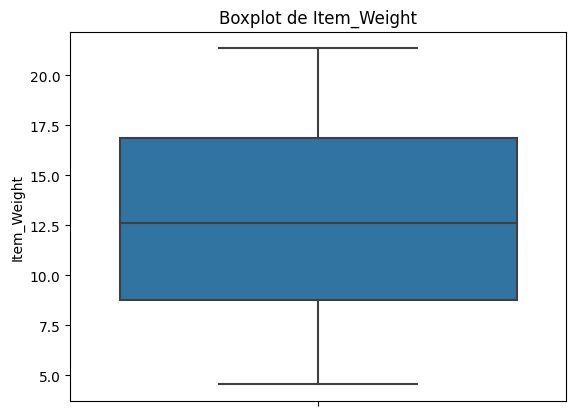

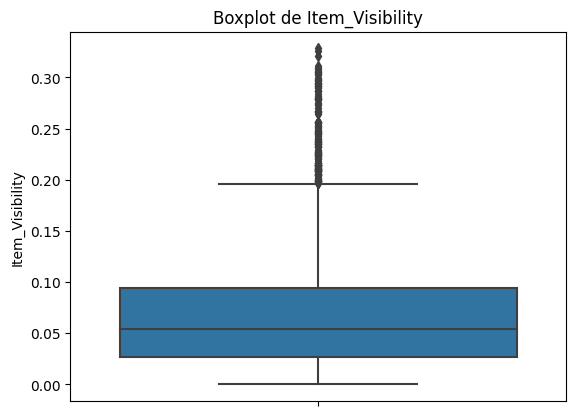

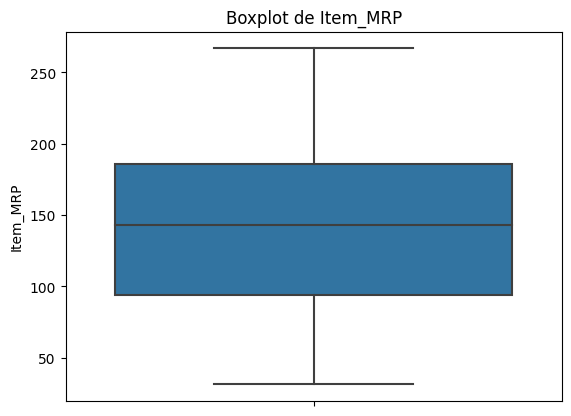

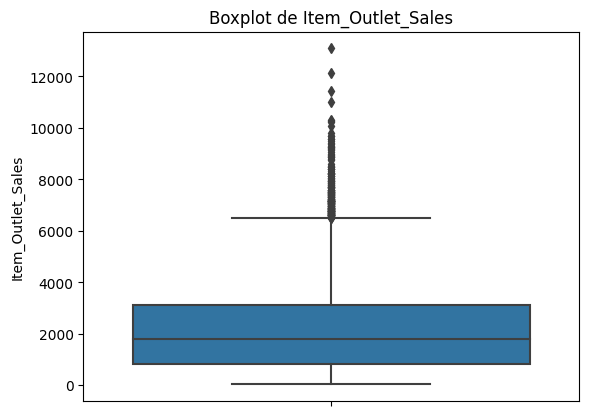

In [11]:
# Seleccionar las columnas numéricas relevantes
numeric_columns = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']

# Crear los boxplots para cada columna numérica
for column in numeric_columns:
    sns.boxplot(y=df[column])
    plt.ylabel(column)
    plt.title(f'Boxplot de {column}')
    plt.show()

<ipython-input-12-2ae7c8a7e6b3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


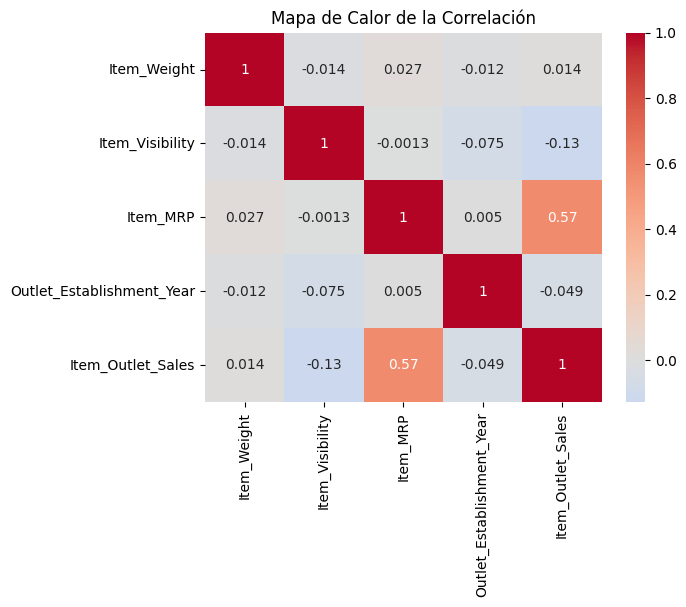

In [12]:
# Calcular la matriz de correlación
correlation_matrix = df.corr()

# Crear el mapa de calor
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)

# Agregar título
plt.title('Mapa de Calor de la Correlación')

# Mostrar el gráfico
plt.show()

# Los valores de correlación se representan con colores, donde los tonos más cálidos (rojos)
# indican una correlación positiva y los tonos más fríos (azules) indican una correlación negativa.
# Los valores cercanos a 1 indican una correlación positiva fuerte,
#  mientras que los valores cercanos a -1 indican una correlación negativa fuerte.
# Los valores cercanos a 0 indican una correlación débil o nula.
# El mapa de calor es una herramienta útil
# para identificar relaciones y patrones entre las características en el conjunto de datos.